<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_01_Grok_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-o6w7ds81
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-o6w7ds81
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [55]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

이 코드는 3큐비트 QFT를 구현하며, ∣001⟩∣001⟩ 상태를 중첩된 주파수 도메인 상태로 변환합니다.<br>Qiskit의 모듈화된 구조를 활용해 회로 생성, QFT 적용, 시뮬레이션을 수행하며,
<br>양자컴퓨팅의 핵심 알고리즘을 실습적으로 이해할 수 있습니다.

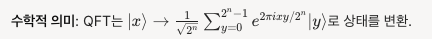

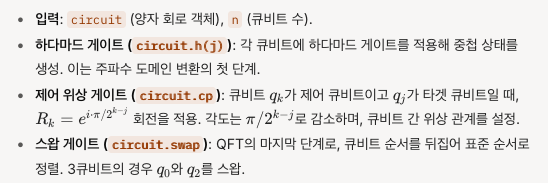

In [56]:
# 3큐비트 QFT 함수 정의
def qft(circuit, n):
    """n개의 큐비트에 대해 QFT를 적용하는 함수"""
    for j in range(n):
        # 현재 큐비트에 하다마드 게이트 적용
        circuit.h(j)
        # 제어 회전 게이트 추가
        for k in range(j + 1, n):
            angle = np.pi / (2 ** (k - j))
            circuit.cp(angle, k, j)
        ###for
    ###for

    # 큐비트 순서 뒤집기 (스왑)
    for j in range(n // 2):
        circuit.swap(j, n - 1 - j)
    ###for
###def

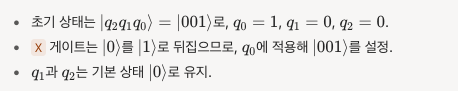

In [57]:
# 3큐비트 회로 생성
n_qubits = 3 # 3 ~ 9까지 늘려보세요.
qc = QuantumCircuit(n_qubits, n_qubits)

# 초기 상태 |001> 설정 (q0=1, q1=0, q2=0)
qc.x(0)  # q0에 X 게이트 적용
qc.barrier()

# QFT 적용
qft(qc, n_qubits)
#qc.barrier()
# 측정을 위해 큐비트별 고전 비트 추가
qc.measure_all() #_all()은 자동적으로 barrier추가


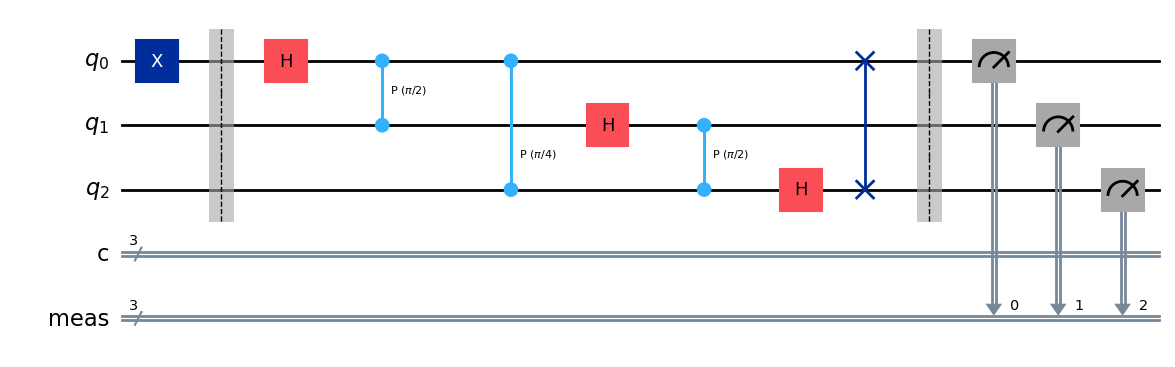

In [58]:
qc.draw('mpl')

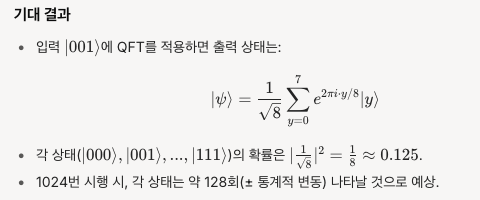

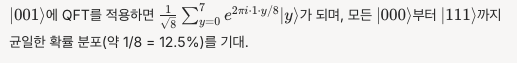

In [59]:
# Step 4: 상태 시뮬레이션 (AerSimulator로 최종 상태 벡터 확인)
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()

compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()
state = result.get_statevector()

In [60]:
# 출력 상태 확인
print("QFT 후 상태 벡터:\n", state)

QFT 후 상태 벡터:
 Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j, -0.+0.0000000e+00j, -0.+0.0000000e+00j,
             -1.+1.2246468e-16j, -0.+0.0000000e+00j],
            dims=(2, 2, 2))


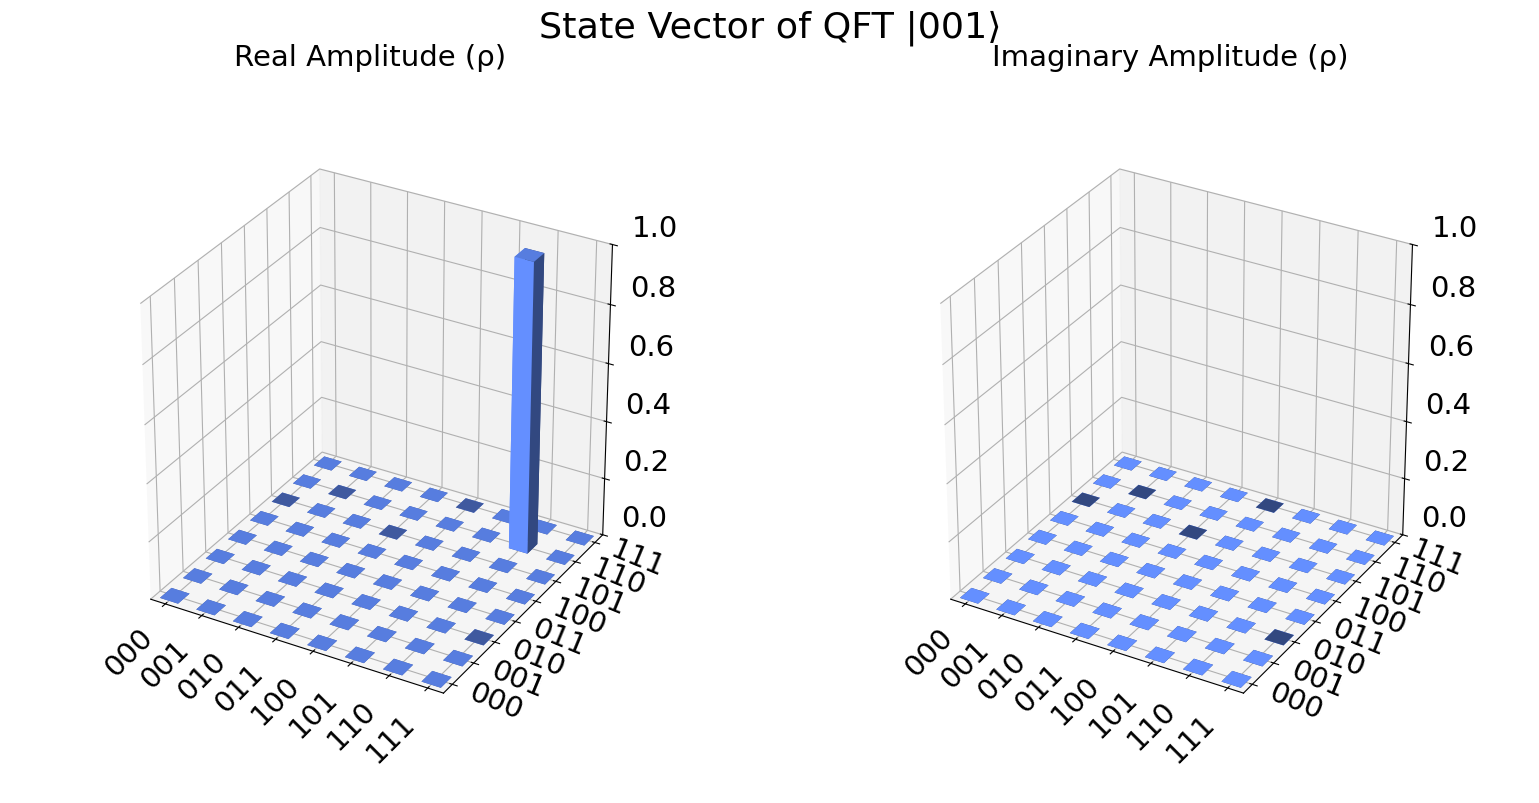

In [62]:
# Step 5: 복소수 진폭을 시각화 (State City plot)
plot_state_city(state, title="State Vector of QFT |001⟩")
#plt.show()